<a href="https://colab.research.google.com/github/hl105/deep-learning-practice/blob/main/kMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-means clustering practice**
##### Yonsei University Deep Learning 4-2
##### July 4th, 2023

####  Unsupervised learning algorithm: clustering
- detect innate patterns in unlabeled data
- it is useful when you don't know what you're looking for
- requires data, but not the labels
- results may not make sense

#### What is K-means clustering?
- Clustering: group together "similar" (option: small squared Euclidean distance) instances
- K: number of clusters. user-defined hyper-parameter
- it's non-deterministic (output changes depending on input)
- it always converges, but not necessarily to an optimal solution

#### Algorithm:
1) pick k random points as cluster centers
2) assign each example data point to the mean cluster that is closest to it using Euclidean distance
3) update cluster center using the mean of points in each cluster
   
#### Elbow Method:
- used to figure out how many clusters we should use
- WCSS = within-cluster sum of squares = distance between points in cluster
- want to minimize WSS, such that WCSS is low but the clusters are small enough to interpret

## **PCA**
##### Yonsei University Deep Learning 4-3
##### July 5th, 2023

#### Curse of Dimensionality
- We want to represent data with fewer dimensions while preserving the variance of the points
- example:
we have 3 points on 2d plane (0,0), (0,1),(1,1)

**we want to change to 1d:**

Using x axis won't help because the points now overlap. Same with y axis.

So we need a **new** axis that preserves the variance. This axis is called the principal component.

if you have a dataset with n variables, a principal component can be represented as a vector with n coefficients. Each coefficient corresponds to the weight or contribution of the respective variable to that principal component.


In [2]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

df = load_wine(as_frame = True).frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# check for null values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [4]:
# remove target column (unsupervised learning)

# axis: whether to drop labels from index(0) or columns(1)
# inplace: if false, return copy. if true, return none
df_unsupervised = df.drop('target', axis = 1, inplace = False)

# Data Transformation: Kmeans is sensitive to the units, so the data should be standardized
# Standardization: (x-mean)/s.d.
scaler = StandardScaler()
scaler.fit(df_unsupervised) # compute mean and std for scaling

#transform and convert to pandas dataframe
scaled_df = pd.DataFrame(scaler.transform(df_unsupervised),columns = df_unsupervised.columns)

scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [5]:
#get rid of labels
X = scaled_df.values

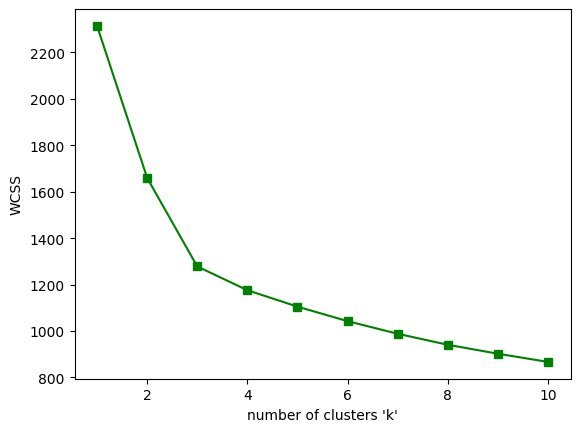

In [6]:
# how do we know how many clusters to use? Elbow method!
def elbow_method(df, maximum_K):

  wcss = {} #key: k, values: wcss

  for k in range(1,maximum_K):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_

  return wcss

def draw_elbow_plot(wcss):
  plt.plot(wcss.keys(), wcss.values(), 'gs-')
  plt.xlabel("number of clusters 'k'")
  plt.ylabel('WCSS')
  plt.show()

draw_elbow_plot(elbow_method(X, 11))
#observe that the drop in inertia "elbow" is minimal after k=5

In [7]:
# now that we know k=3, we can perform k-means model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

kmeans.cluster_centers_ # cluster centers for each column in X
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [8]:
#compare original target and k-means model output
comparison = df['target'] == kmeans.labels_
print(comparison)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: target, Length: 178, dtype: bool


Q: How can we visiually represent this?

A: Using **Principal Component Analysis (PCA)**, a dimension reduction technique

In [9]:
pca_X = PCA(n_components = 2) # reduce features to 2d

reduced_X = pd.DataFrame(data = pca_X.fit_transform(X), columns = ['PCA1', 'PCA2'])

#reduced features
reduced_X.head()


,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [10]:
#reduce cluster centers too using PCA
centers = pca_X.transform(kmeans.cluster_centers_)
centers

array([[-2.72003575, -1.12565126],
       [-0.03695661,  1.77223945],
       [ 2.2761936 , -0.93205403]])

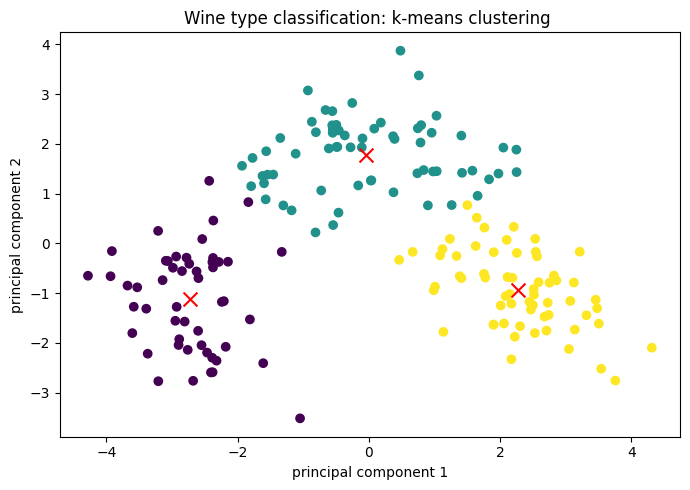

In [11]:
# data visualization
plt.figure(figsize = (7,5))

#Scatter plot
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'],c=kmeans.labels_)

#all elements in first column(x) & second column(y)
plt.scatter(centers[:,0],centers[:,1], marker= 'x', s=100,c='red')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Wine type classification: k-means clustering ')
plt.tight_layout()

We can also find out how much of an effect each feature has on principal component 1 and principal component 2

In [12]:
pca_X.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

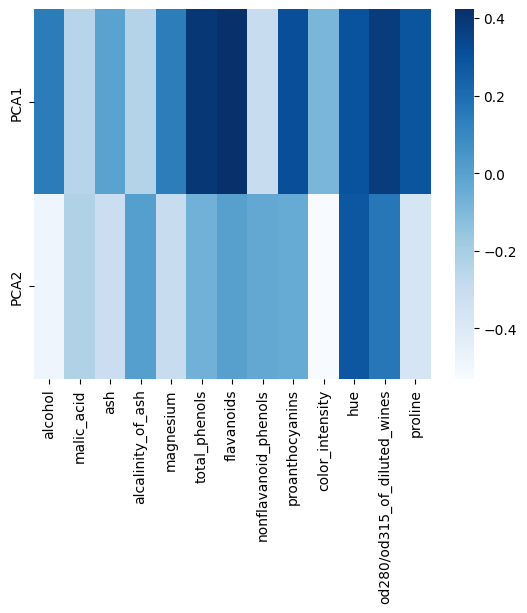

In [13]:
component_df = pd.DataFrame(pca_X.components_, index =['PCA1', 'PCA2'], columns = df_unsupervised.columns)

# Heat Map
sns.heatmap(component_df,cmap=plt.cm.Blues)
plt.show()